## Boston House Prices dataset from UCI

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

/Users/Capgemini/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load dataset and get Info about the dataset
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# make a dataframe from scikit learn loaded dataset
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# basic stats on dataset
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


All the variables are numerical variables, CHAS is a categorical variables indicating 1 when property close to the River Charles. This makes the prediction model building more straigthforward as we don't need categorical variable transformation.

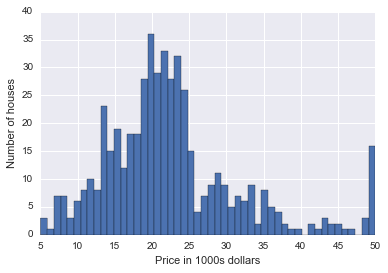

In [5]:
# check distribution of price
plt.hist('Price', bins = 50, data = boston_df)
plt.xlabel('Price in 1000s dollars')
plt.ylabel('Number of houses')

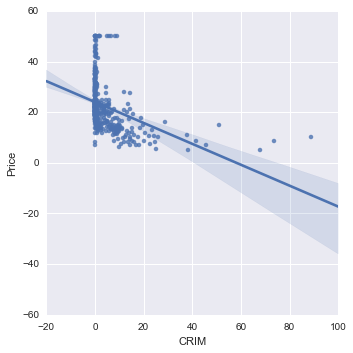

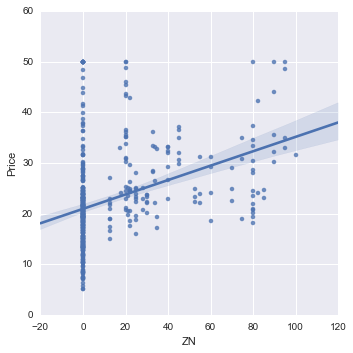

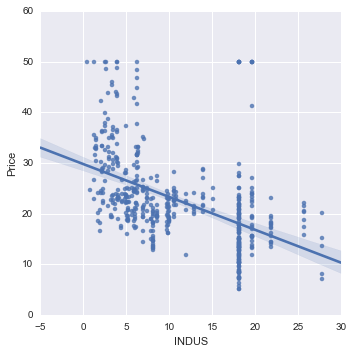

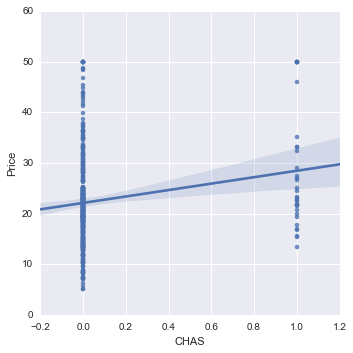

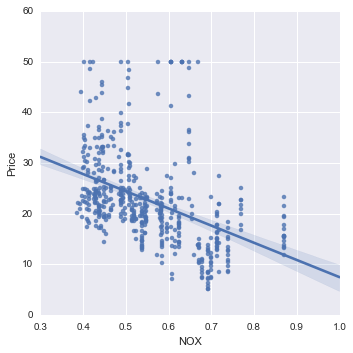

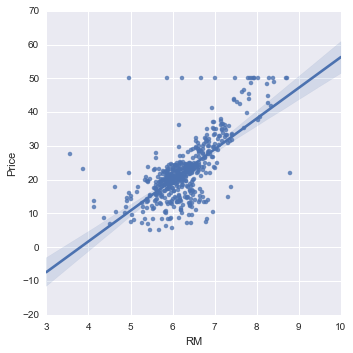

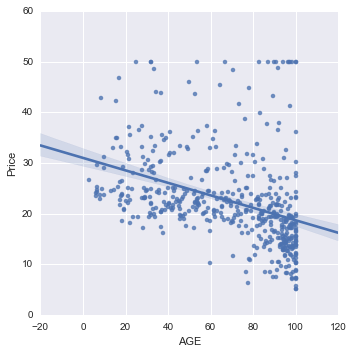

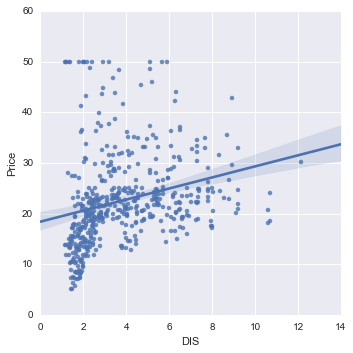

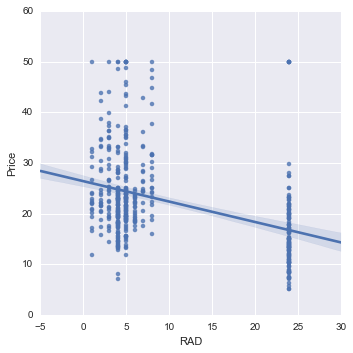

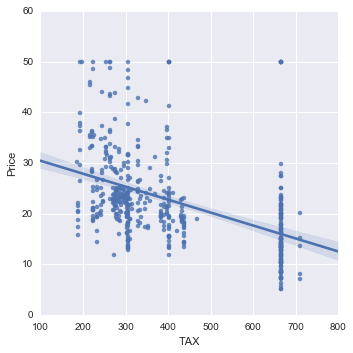

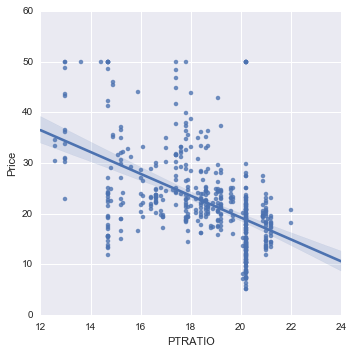

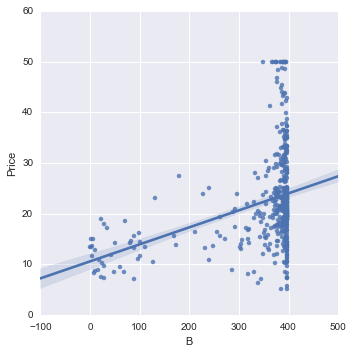

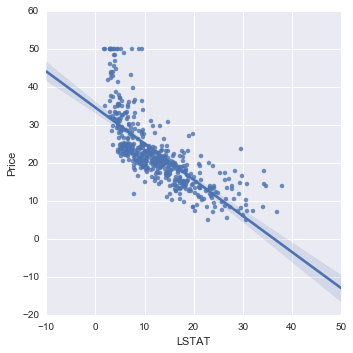

In [6]:
# Plot all features vs Price, to pick any obvious relation by eye.
for i in range(13):
    sns.lmplot(boston_df.columns[i], 'Price', data = boston_df)

On quick inspection, several of the features seem to correlate with house Price. In particular, LSTAT (lower status population%), PTRATIO (pupil-teacher ratio), RM (number of rooms), AGE (proportion of houses older than 1940), and NOX (nitrix oxide levels).

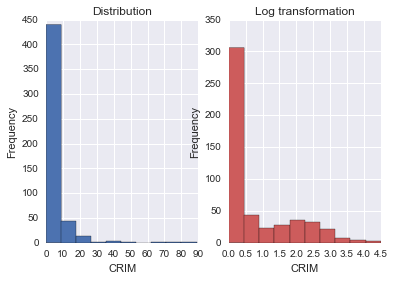

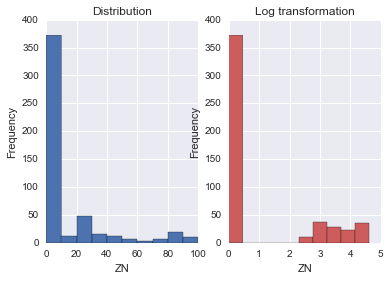

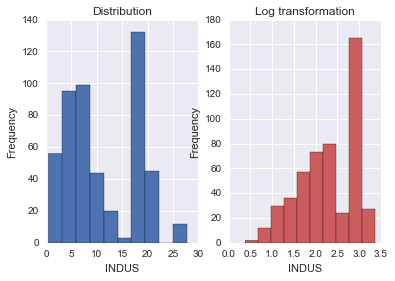

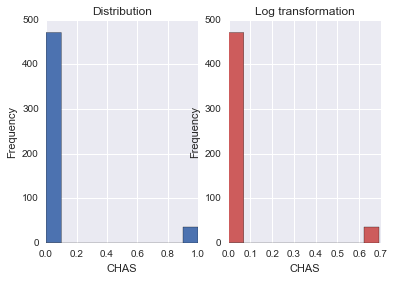

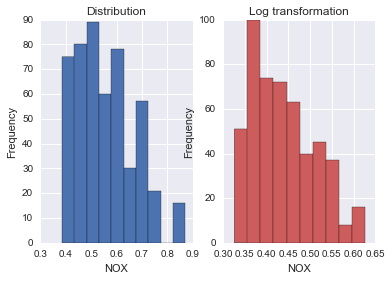

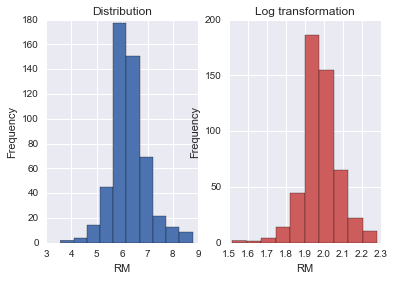

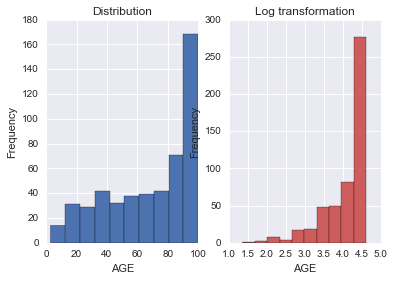

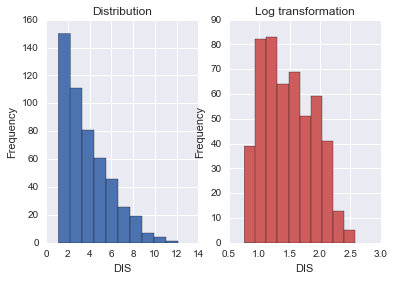

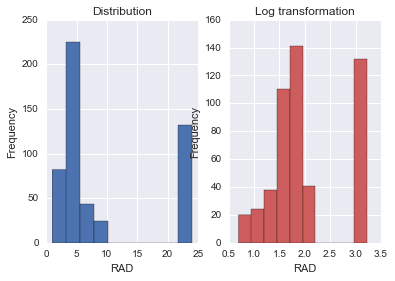

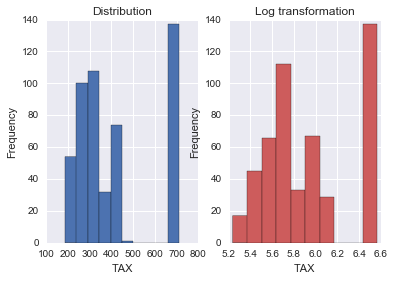

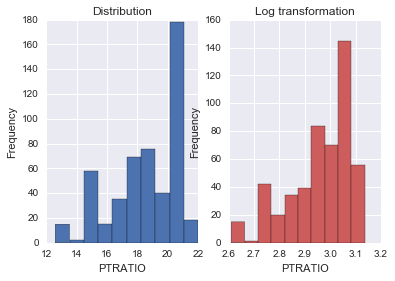

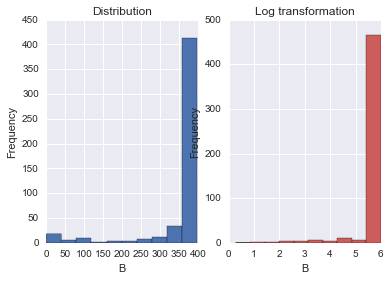

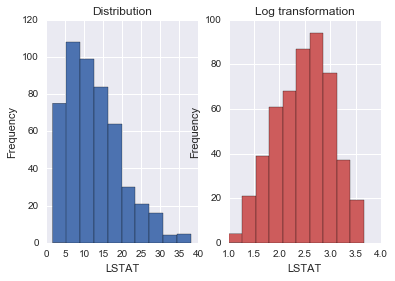

In [7]:
# Check distribution of feature (normal distribution vs other)
# Simultaneously check whether log transformation would make features linear

for i in range(13):
    f, (ax1, ax2) = plt.subplots(1, 2)
    # left plot
    ax1.hist(boston_df.columns[i], data = boston_df)
    ax1.set_xlabel(boston_df.columns[i])
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution')
    # right plot
    x = np.log(boston_df[boston_df.columns[i]] + 1)
    ax2.hist(x, color = 'indianred')
    ax2.set_ylabel('Frequency')
    ax2.set_xlabel(boston_df.columns[i])
    ax2.set_title('Log transformation')

Most of the features are not normally distributed. This may pose a problem when trying to build a linear regression model. Linear features usually offer a better fit. In addition, we see that the log transformation does not linearize the features. Log transformation only offers a benefit for LSTAT and DIS.

## Check multicolinearity (between features) and correlation of features with Price

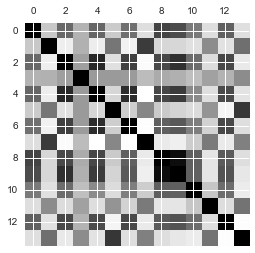

In [8]:
# Plot correlation matrix (black means highly correlated)
plt.matshow(boston_df.corr())

In [9]:
# make correlation matrix and select those with correlation above 0.7
corr_matrix = boston_df.corr()
corr_matrix[corr_matrix > 0.7] = 1
corr_matrix[corr_matrix < -0.7] = 1
corr_matrix[corr_matrix != 1] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1,0,0,0,0,0,0,0,0,0,0,0,0,0
ZN,0,1,0,0,0,0,0,0,0,0,0,0,0,0
INDUS,0,0,1,0,1,0,0,1,0,1,0,0,0,0
CHAS,0,0,0,1,0,0,0,0,0,0,0,0,0,0
NOX,0,0,1,0,1,0,1,1,0,0,0,0,0,0
RM,0,0,0,0,0,1,0,0,0,0,0,0,0,0
AGE,0,0,0,0,1,0,1,1,0,0,0,0,0,0
DIS,0,0,1,0,1,0,1,1,0,0,0,0,0,0
RAD,0,0,0,0,0,0,0,0,1,1,0,0,0,0
TAX,0,0,1,0,0,0,0,0,1,1,0,0,0,0


** Several of the features correlate with each other.**

* INDS is highly correlated with NOX, DIS and TAX. 
* NOX is highly correlated with AGE and DIS. 
* AGE is highly correlated with NOX and DIS.
* RAD is hihgly correlated with TAX
* LSTAT is highly correlated with Price

Notice only, how LSTAT is the only feature that is highly correlated with house pricing. This is an interesting piece of information, that will be important at the time of discussing the prediction models.

### Linear regression using Algebra and Matrix operations

First I will build a linear regression using all the features. 
We need a matrix in which each row is an observation (house) and each column is a feature, plus an additional column for the intercept that will contain 1s in each row.
We also need the vector that we want to predict, in this case Price.

In [10]:
# Build the matrix for prediction, add a column with 1s for  calculation of intercept
X = boston_df.drop('Price', axis = 1)
X['intercept'] = 1
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,intercept
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,1
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,1


In [11]:
# Create an np array
X = np.array(X)
X.shape

(506, 14)

In [12]:
# Build the Y vector to predict with the Price of houses
Y = boston_df.Price
Y.head(2)

0    24.0
1    21.6
Name: Price, dtype: float64

In [13]:
# Build the least square equation: the line that minimises the error.
resultReg = np.linalg.lstsq(X, Y)

coeffs = resultReg[0] # index 0 contains the coefficients and the intercept
len(coeffs)

14

In [14]:
error_total = resultReg[1] # index 1 contains the total error (y_observed - y_predicted)**2
rmse = np.sqrt(error_total/len(X))
rmse

array([ 4.6795063])

### Now we build the same model using SKlearn and compare solutions

In [15]:
# create a linear regression object
# I already imported LinearRegression from sklearn.linear_models
lreg = LinearRegression()
lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lreg.intercept_

36.491103280361912

In [17]:
lreg.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01,   0.00000000e+00])

In [18]:
coeffs # obtained from linear Algebra calculation

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01,   3.64911033e+01])

We see that the values obtained from the matrix multiplication and sklearn are actually the same!!! Bravo!

In [19]:
lreg.score(X,Y) # returns the R squared

0.7406077428649428

In [20]:
# make a dataframe with the features and their coefficients
coef_df = pd.DataFrame(boston_df.columns)
coef_df.columns = ['Features']

coef_df['Coefficients'] = pd.Series(lreg.coef_)
coef_df

,Features,Coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


According to this model, NOX and RM seem to be the variables that drive the linear regression strongly, i.e., the strongest estimators of house pricing. CHAS also has an important contribution.
Note however, that LSTAT, that was highly correlated with PRICE when evaluated individually, is now only midly correlated with Price. This is indeed a consequence of feature multicolinearity. The correlation of other features with Price masks the real relationship between LSTAT and PRice. **Let's keep this in mind for later.**

For the time being, let's build a new model using only NOX, RM and CHAS and see what happens.

In [21]:
X = boston_df[['CHAS','NOX', 'RM' ]]
X = np.array(X)

In [22]:
lreg2 = LinearRegression()
lreg2.fit(X,Y)
lreg2.score(X,Y)

0.55557371305908676

The R squared is much smaller than the previous one. What does this mean? Is the model using all the features better? or is it overfitting to the dataset and would not perform equally well when evaluated on a different set?

Let's build a train and test set, and compare the models using 1) all the features vs 2) a model using CHAS, NOX and RM and a 3) final model using LSTAT.


## Model building and testing

In [23]:
# Separate train and test set
# I already imported train_test_split from sklearn.cross_validation
X_train, X_test, Y_train, Y_test = train_test_split(boston_df.drop('Price', axis = 1),boston_df.Price)

# Print shapes of the training and testing data sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [24]:
# Model using all features

# Create our regression object
lreg_AllFeatures = LinearRegression()

# Fit a linear regression, using only the training set.
lreg_AllFeatures.fit(X_train,Y_train)

# R squared on training and testing sets
print(lreg_AllFeatures.score(X_train, Y_train))
print(lreg_AllFeatures.score(X_test, Y_test))

0.749120828902
0.676196890469


In [25]:
# Model using CHAS, NOX and RM features

boston_3f_df = boston_df[['CHAS', 'NOX', 'RM']]
X_train, X_test, Y_train, Y_test = train_test_split(boston_3f_df, boston_df.Price)

# Create our regression object
lreg_3Features = LinearRegression()

# Fit a linear regression, using only the training set.
lreg_3Features.fit(X_train,Y_train)

# R squared on training and testing sets
print(lreg_3Features.score(X_train, Y_train))
print(lreg_3Features.score(X_test, Y_test))

0.583172899628
0.46100461066


In [26]:
# Model using LSTAT

X_train, X_test, Y_train, Y_test = train_test_split(boston_df.LSTAT, boston_df.Price)

# need arrays in format (nrows, 1)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

# Print shapes of the training and testing data sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 1), (127, 1), (379,), (127,))

In [27]:
# Create our regression object
lreg_LSTAT = LinearRegression()

# Fit a linear regression, using only the training set.
lreg_LSTAT.fit(X_train,Y_train)

# R squared on training and testing sets
print(lreg_LSTAT.score(X_train, Y_train))
print(lreg_LSTAT.score(X_test, Y_test))

0.542280454417
0.54592897728


It looks like, regardless of multicolinearity and the fact that LSTAT is actually the feature most highly correlated with price, when we include all the features in the model, it gives the best predictions. The r squared for the test set was higher in the all feature model. However, note that R squared for model with 3 features or LSTAT is quite similar. This is a potential indication that LSTAT could be our best estimator (see discussion on cross-validation below).

## Let's do some feature selection with SKlearn and compare to our manual selection

In [28]:
# I already imported the feature selection tool from sklearn
# SelectFromModel selects the best features using the linear regression model

# reset the train and test set using all variables
X_train, X_test, Y_train, Y_test = train_test_split(boston_df.drop('Price', axis = 1),boston_df.Price)

# feature selection
model = SelectFromModel(lreg_AllFeatures, prefit=True)
X_new = model.transform(X_train)
X_new.shape

(379, 3)

We see that only 3 of the 13 features are important to predict Price. Which are those?

In [29]:
# makes the inverse transformation, but fills with 0s the columns which features were removed
non_removedFeatures = model.inverse_transform(X_new)

In [30]:
non_removedFeatures = non_removedFeatures.sum(axis = 0)
non_removedFeatures

array([    0.    ,     0.    ,     0.    ,    24.    ,   210.2405,
        2389.735 ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ])

In [31]:
non_removedFeatures[non_removedFeatures > 0 ] = 1

In [32]:
non_removedFeatures

array([ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [33]:
# make a dataframe with the features and whether they were selected (1)
coef_df = pd.DataFrame(boston_df.columns)
coef_df.columns = ['Features']

coef_df['Coefficients'] = pd.Series(non_removedFeatures)
coef_df

,Features,Coefficients
0,CRIM,0
1,ZN,0
2,INDUS,0
3,CHAS,1
4,NOX,1
5,RM,1
6,AGE,0
7,DIS,0
8,RAD,0
9,TAX,0


We see that sklearn deterimined as the optimal features for the linear regression those that we manually selected previously, based on the size of the linear regression coefficient. So, we agree with sklearn basically, or I'd better say, sklearn agrees with us ;)

Let's remind ourselves what the coefficients for these features were. We need to look at the linear model with 3 features.

In [34]:
lreg_3Features.coef_

array([  4.30676464, -22.86319545,   7.77836469])

As expected from what we observed in the plots of these features vs Price at the very begining of this notebook, NOX has a negative influence on house Prices, whereas CHAS and RM a positive influence.

## Cross-validation

When training estimators on a train set and evaluating their performance on a test set, there is still a risk of overfitting because the parameters can be tweaked until the estimator performs optimally on the test set. This means that knowledge about the test set can “leak” into the prediction model, making it unable to perform well in different, unseen dataset.

To solve this problem, we can use cross validation. In this procedure, a part of the dataset is held out as a so-called “validation set”. For example, the dataset is divided in 3, the model is trained on 2/3 of the set and tested on the remaining 1/3. And this procedure is repeated a few times, and then the score of the model is averaged accross the times it was repeated. The dataset is divided in 3 randomly, simulating the testing over different 'unseen data' each time. Let's see how our models perform during cross validation.

In [35]:
from sklearn import metrics
from sklearn import cross_validation

# Fit model with all features on whole dataset
lreg_AllFeat = LinearRegression()
lreg_AllFeat.fit(boston_df.drop('Price', axis = 1), boston_df.Price)

scores = cross_validation.cross_val_score(lreg_AllFeat, boston_df.drop('Price', axis = 1), boston_df.Price,
                                          cv=3, scoring = 'r2')
scores

array([ 0.5828011 ,  0.53193819, -5.85104986])

In [36]:
scores.mean()

-1.5787701857180654

In [37]:
# Fit model with all features on whole dataset
lreg_3Feat = LinearRegression()
lreg_3Feat.fit(boston_df[['CHAS', 'NOX','RM']], boston_df.Price)

scores = cross_validation.cross_val_score(lreg_3Feat, boston_df[['CHAS', 'NOX','RM']], boston_df.Price,
                                          cv=3, scoring = 'r2')
scores

array([ 0.50048769,  0.14517779, -0.665559  ])

In [38]:
scores.mean()

-0.0066311743671046974

In [39]:
# Fit model with all features on whole dataset

# need arrays in format nrows, 1
X = np.vstack(boston_df.LSTAT)

lreg_1Feat = LinearRegression()
lreg_1Feat.fit(X, boston_df.Price)

scores = cross_validation.cross_val_score(lreg_1Feat, X, boston_df.Price,
                                          cv=3, scoring = 'r2')
scores

array([ 0.4282059 ,  0.10625862,  0.42011508])

In [40]:
scores.mean()

0.3181932001276237

The cross validation scores are quite variable within each of the models (all features, 3 features or 1 feature models, respectively). It looks like the model including all feature has the biggest variability in the cross validation, which suggests that although it fits the best to this data, it would not perform well in out of sample data (un-seen data), whereas the model containing LSTAT seems to be the most robust to cross validation.